# Bike Rental Analysis and Prediction

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,ShuffleSplit
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

A lot of cities in the world are implementing bike rental stations as part of their integrated transport system. Additional to increasing the available options of moving around the city, these systems bring a lot of good consequences to urban spaces, like reducing emissions, traffic jams and improoving the health of citizens. In order to have a system working, it's important to have the correct capacity for satisfying the needs of the users.

The goal of this project is predicting the amount of bicycles needed in a city based on some temporal and weather conditions. This will let the program managers to handle their capacity, program maintenance better and keep their user rate increasing. The first part of the project is an exploratory data analysis in order to understand some of the features and variables in the dataset.

In [216]:
day = pd.read_csv('data/day.csv',sep=',')
hour = pd.read_csv('data/hour.csv',sep=',')

In [217]:
day.shape

(731, 16)

This dataset has 731 observations and 16 attributes, which 3 of them are response variables. Previous to any analysis, I will split the data and keep the test data apart, respecting the golden rule of machine learning. I decided to work with the `day` dataset, which groups the hourly observations into days.

In [219]:
day_train,day_test = train_test_split(day,test_size=0.3)

In [220]:
day_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
286,287,2011-10-14,4,0,10,0,5,1,2,0.550833,0.529675,0.716250,0.223883,529,3115,3644
112,113,2011-04-23,2,0,4,0,6,0,2,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
330,331,2011-11-27,4,0,11,0,0,0,1,0.459167,0.455800,0.698333,0.208954,810,2261,3071
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536


### Data Cleaning and Wrangling

Now I divide the original dataset into the explanatory and the response variables. I also dropped the feature `instant`, which is just a database id for the day information:

In [221]:
day_train_y = day_train[['casual','registered','cnt']]
day_train_x = day_train[day_train.columns.difference(['casual','registered','cnt','instant','dteday'])]
#day_train_x = day_train['temp']

In [222]:
day_test_y = day_test[['casual','registered','cnt']]
day_test_x = day_test[day_test.columns.difference(['casual','registered','cnt','instant','dteday'])]
#day_test_x = day_test['temp']

Now, it's important to prepare the dataset for using it in Scikit Learn. Will convert it from the Pandas dataframe into numpy arrays.

In [223]:
X_train = pd.DataFrame.as_matrix(day_train_x)

#Extracting the response variable for the total rentals
y_train_t = day_train_y['cnt']
y_train_t = pd.DataFrame.as_matrix(y_train_t)

#Extracting the response variable for the casual users
y_train_c = day_train_y['casual']
y_train_c = pd.DataFrame.as_matrix(y_train_c)

#Extracting the response variable for the registered users
y_train_r = day_train_y['registered']
y_train_r = pd.DataFrame.as_matrix(y_train_r)

In [224]:
X_test = pd.DataFrame.as_matrix(day_test_x)

#Extracting the response variable for the total rentals
y_test_t = day_test_y['cnt']
y_test_t = pd.DataFrame.as_matrix(y_test_t)

#Extracting the response variable for the casual users
y_test_c = day_test_y['casual']
y_test_c = pd.DataFrame.as_matrix(y_test_c)

#Extracting the response variable for the registered users
y_test_r = day_test_y['registered']
y_test_r = pd.DataFrame.as_matrix(y_test_r)

### Exploratory Data Analysis

The idea with the Exploratory Data Analysis (EDA) is finding some general patterns in the dataset, which will be contrasted with the results of the models. The features are divided in two groups:

- Weather features: for each observation (day) we have the normalized temperature, feeling temperature, wind, humidity and general weather situation (Cloudy, Sunny

- Date features.

On the other hand, the explanatory variables are the total number of rentals per day `cnt`, the number of those rentals made by previously registered users `registered` and the number of those rentals made by `casual` users. The idea with this EDA is observing the relations between the two groups of features with these response variables.

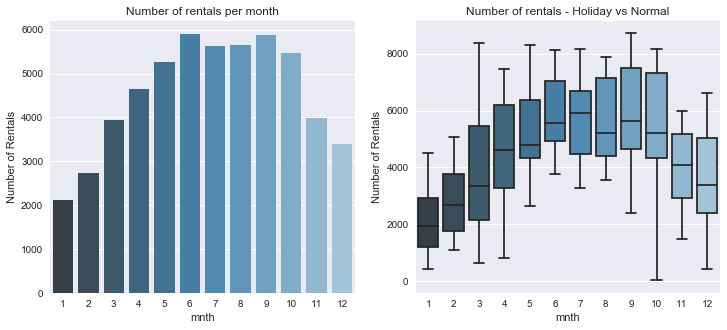

In [119]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(x="mnth", y="cnt", data=day_train,ax=axes[0],ci=None,palette="Blues_d")
axes[0].set_title('Number of rentals per month')
axes[0].set_ylabel('Number of Rentals')
sns.boxplot(  y="cnt", x= "mnth", data=day_train,  orient='v' , ax=axes[1],palette="Blues_d")
axes[1].set_title('Number of rentals - Holiday vs Normal')
axes[1].set_ylabel('Number of Rentals')
plt.show()

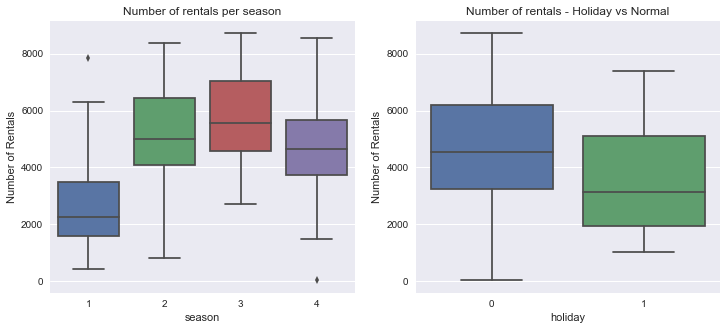

In [104]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.boxplot(  y="cnt", x= "season", data=day_train,  orient='v' , ax=axes[0])
axes[0].set_title('Number of rentals per season')
axes[0].set_ylabel('Number of Rentals')
sns.boxplot(  y="cnt", x= "holiday", data=day_train,  orient='v' , ax=axes[1])
axes[1].set_title('Number of rentals - Holiday vs Normal')
axes[1].set_ylabel('Number of Rentals')
plt.show()

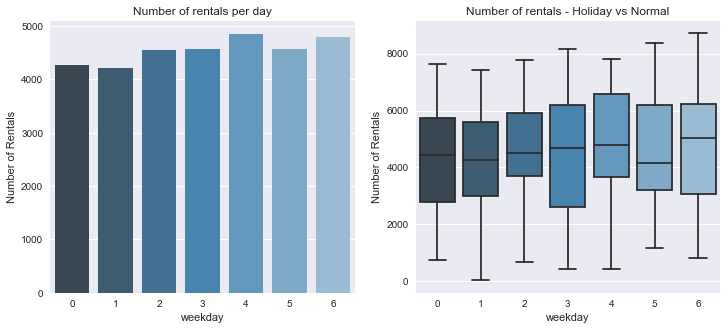

In [118]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(x="weekday", y="cnt", data=day_train,ax=axes[0],ci=None,palette="Blues_d")
axes[0].set_title('Number of rentals per day')
axes[0].set_ylabel('Number of Rentals')
sns.boxplot(y="cnt", x= "weekday", data=day_train,  orient='v' , ax=axes[1],palette="Blues_d")
axes[1].set_title('Number of rentals - Holiday vs Normal')
axes[1].set_ylabel('Number of Rentals')
plt.show()

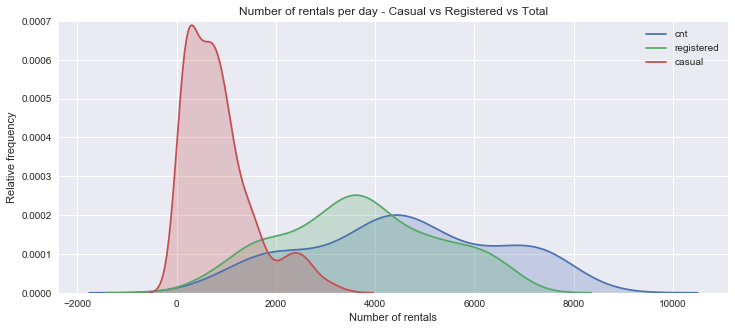

In [95]:
plt.figure(figsize=(12,5))
plt.title("Number of rentals per day - Casual vs Registered vs Total")
sns.kdeplot(day_train["cnt"], shade=True,legend=True)
sns.kdeplot(day_train["registered"], shade=True,legend=True)
sns.kdeplot(day_train["casual"], shade=True,legend=True)
plt.ylim(0,0.0007)
plt.xlabel("Number of rentals")
plt.ylabel("Relative frequency")
plt.show()

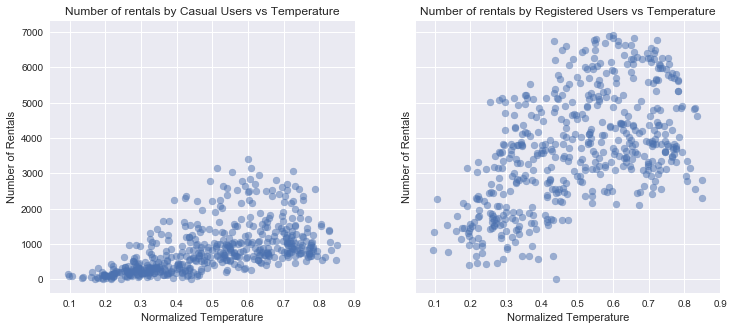

In [86]:
f, axarr = plt.subplots(1,2, sharey=True,figsize=(12,5))
axarr[0].scatter(day_train['temp'], day_train['casual'], alpha=0.5,label="Test Data")
axarr[0].set_title('Number of rentals by Casual Users vs Temperature')
axarr[0].set_xlabel('Normalized Temperature')
axarr[0].set_ylabel('Number of Rentals')
axarr[1].scatter(day_train['temp'], day_train['registered'], alpha=0.5,label="Test Data")
axarr[1].set_title('Number of rentals by Registered Users vs Temperature')
axarr[1].set_xlabel('Normalized Temperature')
axarr[1].set_ylabel('Number of Rentals')
plt.show()

From the previous scatterplots we can see that the relationship between temperature and total number of rentals is different depending on the type of user. The casual users, possibly tourists, have a slightly increasing number of rentals when the weather is warmer. On the other hand, registered users are highly influenced by the weather for deciding to rent the bikes. This insight is relevant for the model fitting section, because graphically we can say that both groups of users have different patterns.

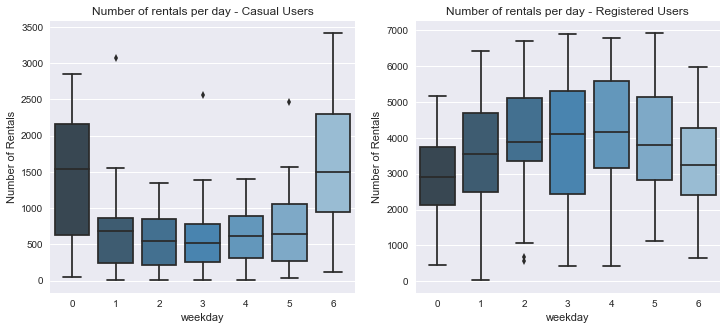

In [120]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.boxplot(y="casual", x= "weekday", data=day_train,  orient='v' , ax=axes[0],palette="Blues_d")
axes[0].set_title('Number of rentals per day - Casual Users')
axes[0].set_ylabel('Number of Rentals')
sns.boxplot(y="registered", x= "weekday", data=day_train,  orient='v' , ax=axes[1],palette="Blues_d")
axes[1].set_title('Number of rentals per day - Registered Users')
axes[1].set_ylabel('Number of Rentals')
plt.show()

There are even more differences between Casual and Registered users. From the previous boxplots we can see that casual users rent their bikes mainly on weekends, while registered users rent them on working days. This tells us more about the difference of both groups. Casual users use the bikes for pleasure and maybe most of them are tourists. On the other hand registered users use them as a transport system for their daily commute. Even though we don't have information about the users, this data exploration tells us a lot about them. For this reason in the following section we need to treat them differently.

In [18]:
day_train_y.describe()

,casual,registered,cnt
count,511.000000,511.000000,511.000000
mean,860.168297,3697.608611,4557.776908
std,695.752711,1572.964501,1957.390025
min,2.000000,20.000000,22.000000
25%,315.500000,2547.000000,3178.500000
50%,699.000000,3656.000000,4509.000000
75%,1133.000000,4861.000000,6146.500000
max,3410.000000,6917.000000,8714.000000


In [19]:
day_train_x.describe()

,atemp,holiday,hum,mnth,season,temp,weathersit,weekday,windspeed,workingday,yr
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.478443,0.025440,0.625206,6.418787,2.438356,0.498789,1.401174,3.052838,0.188040,0.702544,0.500978
std,0.160922,0.157613,0.139301,3.442064,1.109503,0.181176,0.540079,1.977111,0.076701,0.457587,0.500489
min,0.098839,0.000000,0.000000,1.000000,1.000000,0.096522,1.000000,0.000000,0.022392,0.000000,0.000000
25%,0.341079,0.000000,0.520000,3.000000,1.000000,0.342083,1.000000,1.000000,0.134025,0.000000,0.000000
50%,0.493046,0.000000,0.626667,6.000000,2.000000,0.506667,1.000000,3.000000,0.176617,1.000000,1.000000
75%,0.607969,0.000000,0.727291,9.000000,3.000000,0.654583,2.000000,5.000000,0.230723,1.000000,1.000000
max,0.840896,1.000000,0.972500,12.000000,4.000000,0.849167,3.000000,6.000000,0.441563,1.000000,1.000000


### Feature engineering

Some of the features in the dataset represent categories: 

### Feature and Model Selection

Since the response variables in this data are numerical, the models used for explaining and predicting them should be part of the *regression* group. I will work with linear regression and will also use random forests regression, for testing both approaches.

In [229]:
lm = LinearRegression()
lm.fit(X_train,y_train_t)
lm.score(X_test,y_test_t)

0.82254775781984635

In [230]:
alpha_values = np.arange(0.05, 20, 0.1)
r_1 = RidgeCV()
r_1.fit(X_train,y_train_t)
r_1.alpha_

1.0

In [231]:
r_1.coef_

array([ 2443.75225712,  -715.12036308,  -808.2649267 ,   -13.46863393,
         440.90074397,  2820.46069693,  -660.38070883,    49.55653712,
       -1862.51328149,   201.73991039,  2052.2747557 ])

In [239]:
r_1.score(X_test,y_test_t)

0.82228286366766667

In [233]:
las_1 = LassoCV()
las_1.fit(X_train,y_train_t)
las_1.alpha_

1.7944199432447023

In [238]:
las_1.score(X_test,y_test_t)

0.82242453193382414

In [241]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train_t)
regr.score(X_test,y_test_t)

0.69085036491210261